## Regressão linear

In [1557]:
import numpy as np
import pandas as pd
import sklearn.feature_selection as fs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [1558]:
def daterange(start_date, end_date):
    for i in range(int((end_date - start_date).days)):
         yield start_date + datetime.timedelta(i)

## Exemplo com Adamantina

In [1559]:
#trocar para o cod_ibge de acordo com a cidade desejada
cidade = '3500105'

### Modelo para Casos

In [1560]:
dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
nome = dataframe['Município'][0]
dataframe


,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,ADAMANTINA,3500105.0,35111.0,0.000000,0.067900,0.0,0.000000,0.000000,0.062927,2021-02-21,0.25000,0.5,0.568966,0.444444,0.437308,0.462963,0.0
1,1,ADAMANTINA,3500105.0,35111.0,0.000559,0.068401,0.0,0.000540,0.000559,0.063391,2021-02-22,0.65625,0.5,0.620690,0.444444,0.452059,0.037037,0.0
2,2,ADAMANTINA,3500105.0,35111.0,0.001829,0.076029,0.0,0.003638,0.001829,0.070460,2021-02-23,0.31250,0.0,0.482759,0.444444,0.466810,0.111111,0.0
3,3,ADAMANTINA,3500105.0,35111.0,0.002134,0.076904,0.0,0.004106,0.002134,0.071271,2021-02-24,0.21875,0.5,0.431034,0.444444,0.437308,1.000000,0.0
4,4,ADAMANTINA,3500105.0,35111.0,0.002896,0.092410,0.0,0.009112,0.002896,0.085641,2021-02-25,0.12500,0.5,0.275862,0.555556,0.351875,0.092593,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,ADAMANTINA,3500105.0,35111.0,0.976066,0.988621,1.0,0.979759,0.976066,0.989454,2021-07-15,0.18750,0.0,0.198276,0.111111,0.110633,0.185185,0.0
145,145,ADAMANTINA,3500105.0,35111.0,0.990447,0.996374,1.0,0.992184,0.990447,0.996639,2021-07-16,0.09375,0.0,0.163793,0.111111,0.226490,0.074074,0.0
146,146,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-17,0.00000,0.0,0.060345,0.000000,0.092502,0.259259,0.0
147,147,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-18,0.06250,0.0,0.034483,0.000000,0.000000,0.611111,0.0


### *Seleção de atributos*

In [1561]:
#usado para determinar o tamanho do conjunto de validação
tam = 30

dataframe = dataframe.set_index(['data'])
dataframe.index = pd.to_datetime(dataframe.index)
dataframe = dataframe.drop(columns=['Município', 'Código IBGE', 'Populacao', 'Unnamed: 0'])
val = dataframe[dataframe.shape[0]-tam-1:]

dataframe = dataframe[:-tam]

test_ratio = 0.2
X = dataframe.drop(columns=['diagnostico_covid19'])
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = dataframe['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)

In [1562]:
sel = fs.VarianceThreshold()
y = dataframe['diagnostico_covid19']

test_ratio = 0.5

menor = 99

for i in range(11, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=test_ratio, shuffle=False)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    pred = linear.predict(X_test)
    score = mean_squared_error(y_test, pred)
    if score < menor:
        menor = score
        resul = X_sel
    print("Score com k = {} -> {}" .format(i, score))
    
print(resul)

Score com k = 11 -> 0.03381381556391716
Score com k = 10 -> 0.05418092948614148
Score com k = 9 -> 0.04810972611109416
Score com k = 8 -> 0.04681746164957682
Score com k = 7 -> 0.06231351693471273
Score com k = 6 -> 0.022862962881724038
Score com k = 5 -> 0.02397071940129761
Score com k = 4 -> 0.02397071940129756
Score com k = 3 -> 0.02397071940129757
Score com k = 2 -> 0.019964181347026946
Score com k = 1 -> 0.018051217554335332
[[0.56896552]
 [0.62068966]
 [0.48275862]
 [0.43103448]
 [0.27586207]
 [0.24137931]
 [0.24137931]
 [0.17241379]
 [0.0862069 ]
 [0.05172414]
 [0.06896552]
 [0.06896552]
 [0.12931034]
 [0.1637931 ]
 [0.21551724]
 [0.20689655]
 [0.26724138]
 [0.31896552]
 [0.32758621]
 [0.36206897]
 [0.31896552]
 [0.34482759]
 [0.39655172]
 [0.34482759]
 [0.28448276]
 [0.28448276]
 [0.31896552]
 [0.45689655]
 [0.49137931]
 [0.52586207]
 [0.65517241]
 [0.74137931]
 [0.81896552]
 [0.82758621]
 [0.75      ]
 [0.68103448]
 [0.62931034]
 [0.56896552]
 [0.51724138]
 [0.65517241]
 [0.57

In [1563]:
# sendo a média móvel de casos o melhor atributo, iniciando os testes

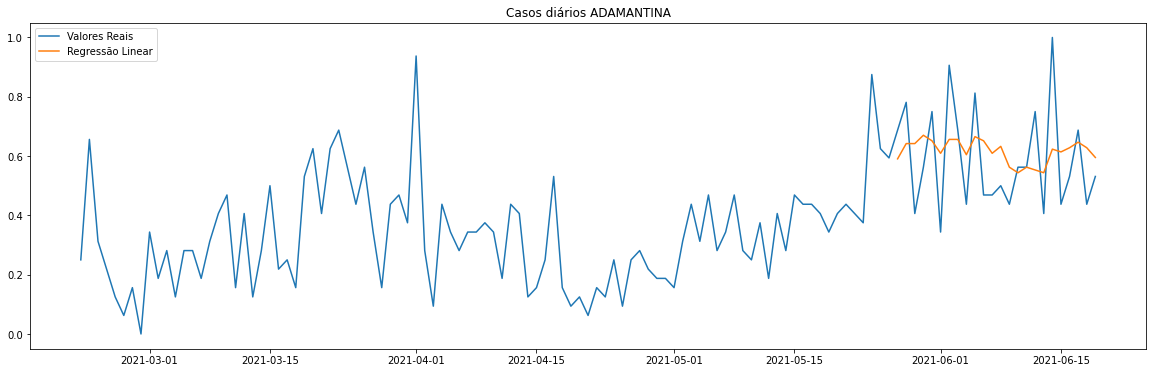

Erro quadrático
0.027423156502356872


In [1564]:
df = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
tam = 30
df = df.set_index(['data'])
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Município', 'Código IBGE', 'Populacao'])

val = df[df.shape[0]-tam-1:]

df = df[:-tam]

test_ratio = 0.2

X = dataframe[['media_movel_casos']]
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = df['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.title("Casos diários " + nome)
plt.show()

print("Erro quadrático")

print(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred']))

### Deslocando os últimos dias

In [1565]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_casos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [1566]:
for dias in range(0, 15):
    menor2 = 99
    meor3= 99
    tam = 30
    test_ratio = 0.2
    
    dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
    df_generated = generate_time_lags(dataframe, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_casos']
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)
    h = mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])
    if(h < menor2):
        menor2 = h
        menor3 = dias
    print(str(dias) + " -> "+ str(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])))



0 -> 0.027423156502356872
1 -> 0.014443964874275066
2 -> 0.01431068430386099
3 -> 0.013373013931213705
4 -> 0.013738157879780874
5 -> 0.014376091726237897
6 -> 0.013170572342307407
7 -> 0.013861708504172923
8 -> 0.010203328001471884
9 -> 0.00992460943741619
10 -> 0.010016272228801177
11 -> 0.0100049933675871
12 -> 0.009845373992887539
13 -> 0.009460911238956263
14 -> 0.009181227500756275


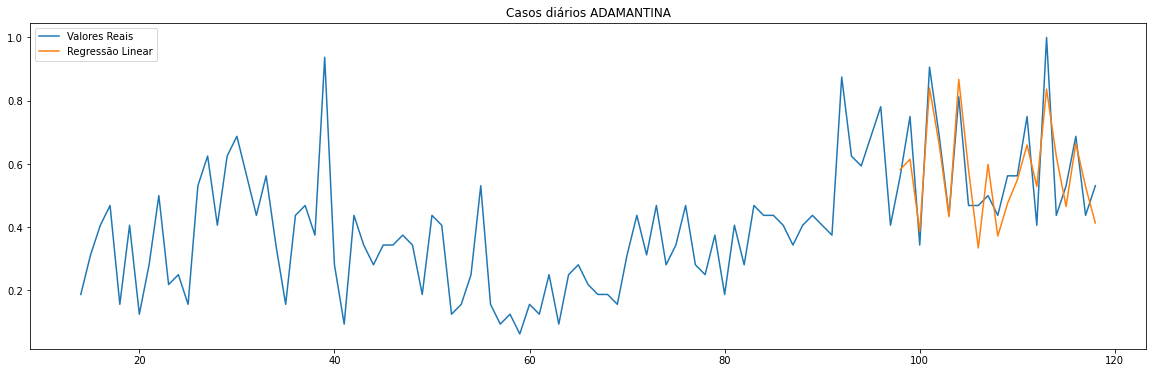

Erro quadrático
0.009181227500756275


In [1567]:
input_dim = menor3
tam = 30

dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
df_generated = generate_time_lags(dataframe, input_dim)
df_generated

val = df_generated[df_generated.shape[0]-tam-1:]
df_generated = df_generated[:-tam]
test_ratio = 0.2

lista = ['media_movel_casos']
for k in range(1, input_dim+1):
    lista.append(f"lag{k}")

X = df_generated[lista]
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.title("Casos diários " + nome)
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred']))

## *Realizando modelo para óbitos*

In [1568]:
dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
dataframe.head(5)

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,ADAMANTINA,3500105.0,35111.0,0.000000,0.067900,0.0,0.000000,0.000000,0.062927,2021-02-21,0.25000,0.5,0.568966,0.444444,0.437308,0.462963,0.0
1,1,ADAMANTINA,3500105.0,35111.0,0.000559,0.068401,0.0,0.000540,0.000559,0.063391,2021-02-22,0.65625,0.5,0.620690,0.444444,0.452059,0.037037,0.0
2,2,ADAMANTINA,3500105.0,35111.0,0.001829,0.076029,0.0,0.003638,0.001829,0.070460,2021-02-23,0.31250,0.0,0.482759,0.444444,0.466810,0.111111,0.0
3,3,ADAMANTINA,3500105.0,35111.0,0.002134,0.076904,0.0,0.004106,0.002134,0.071271,2021-02-24,0.21875,0.5,0.431034,0.444444,0.437308,1.000000,0.0
4,4,ADAMANTINA,3500105.0,35111.0,0.002896,0.092410,0.0,0.009112,0.002896,0.085641,2021-02-25,0.12500,0.5,0.275862,0.555556,0.351875,0.092593,0.0


### Seleção de atributos

In [1569]:
tam = 30
dataframe = dataframe.set_index(['data'])
dataframe.index = pd.to_datetime(dataframe.index)
dataframe = dataframe.drop(columns=['Município', 'Código IBGE', 'Populacao', 'Unnamed: 0'])
val = dataframe[dataframe.shape[0]-tam-1:]

dataframe = dataframe[:-tam]

test_ratio = 0.2
X = dataframe.drop(columns=['obito'])
y = pd.DataFrame(data=[])
y['obito'] = dataframe['obito']

val_ratio = test_ratio / (1 - test_ratio)

sel = fs.VarianceThreshold()
y = dataframe['obito']

test_ratio = 0.5

menor = 99

for i in range(11, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=test_ratio, shuffle=False)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    pred = linear.predict(X_test)
    score = mean_squared_error(y_test, pred)
    if score < menor:
        menor = score
        resul = X_sel
    print("Score com k = {} -> {}" .format(i, score))
    
print(resul)

Score com k = 11 -> 0.14750425244371096
Score com k = 10 -> 0.11632885802537203
Score com k = 9 -> 0.16261365568486846
Score com k = 8 -> 0.24602286061124742
Score com k = 7 -> 0.11288321812947591
Score com k = 6 -> 0.11303706336581934
Score com k = 5 -> 0.1129529789366593
Score com k = 4 -> 0.11295297893665937
Score com k = 3 -> 0.1485048967440116
Score com k = 2 -> 0.11295158544942302
Score com k = 1 -> 0.14430739476885138
[[0.00000000e+00 6.79004627e-02 0.00000000e+00 0.00000000e+00
  4.44444444e-01 4.37307929e-01 4.62962963e-01]
 [5.58971492e-04 6.84006502e-02 5.40248514e-04 5.58971492e-04
  4.44444444e-01 4.52059004e-01 3.70370370e-02]
 [1.82936125e-03 7.60285107e-02 3.63767333e-03 1.82936125e-03
  4.44444444e-01 4.66810080e-01 1.11111111e-01]
 [2.13425479e-03 7.69038389e-02 4.10588871e-03 2.13425479e-03
  4.44444444e-01 4.37307929e-01 1.00000000e+00]
 [2.89648864e-03 9.24096536e-02 9.11219161e-03 2.89648864e-03
  5.55555556e-01 3.51874616e-01 9.25925926e-02]
 [2.89648864e-03 9.25

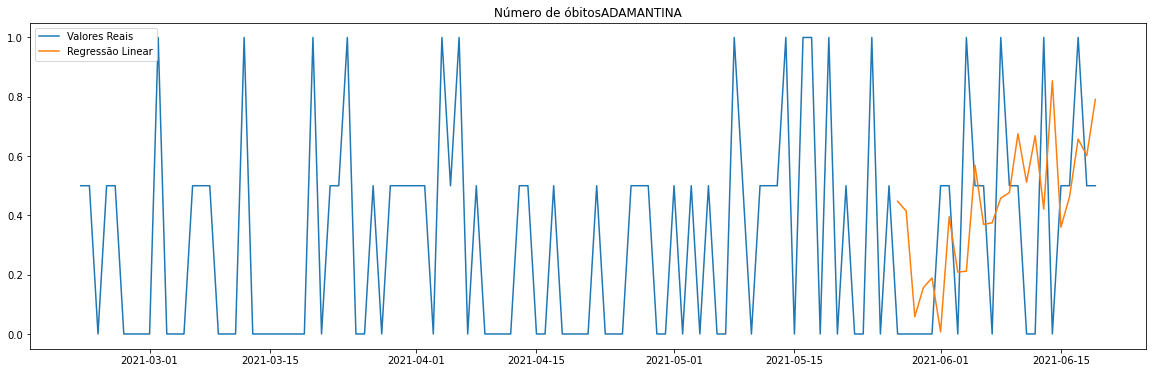

Erro quadrático
0.16036528006762327


In [1570]:
df = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
tam = 30
df = df.set_index(['data'])
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Município', 'Código IBGE', 'Populacao'])

val = df[df.shape[0]-tam-1:]

df = df[:-tam]

test_ratio = 0.2

X = dataframe.drop(columns=['obito', 'media_isolamento', 'Mean.R'])
y = pd.DataFrame(data=[])
y['obito'] = df['obito']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.title("Número de óbitos" + nome)
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['obito'], y_test['pred']))

### Utilizando a média deslocada dos últimos dias

In [1571]:
def generate_time_lags2(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_obitos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [1572]:
for dias in range(0, 15):
    
    menor = 99
    tam = 30
    test_ratio = 0.2
    
    dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
    df_generated = generate_time_lags2(dataframe, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_obitos', 'media_isolamento']
    
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['obito'] = df_generated['obito']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)
    
    h = mean_squared_error(y_test['obito'], y_test['pred'])
    if(h < menor):
        menor = h
        menor2 = dias

    print(str(dias) + " -> "+ str(mean_squared_error(y_test['obito'], y_test['pred'])))


0 -> 0.11142857145074474
1 -> 0.06320447320527343
2 -> 0.06254317379857018
3 -> 0.06300238905495971
4 -> 0.06273882221454265
5 -> 0.06270453735883728
6 -> 0.06206472950252253
7 -> 0.06106577231872796
8 -> 0.04746997423580256
9 -> 0.04692812621226137
10 -> 0.04656265553054599
11 -> 0.04829178696221976
12 -> 0.05063037025095099
13 -> 0.050960759809638316
14 -> 0.042007715111204276


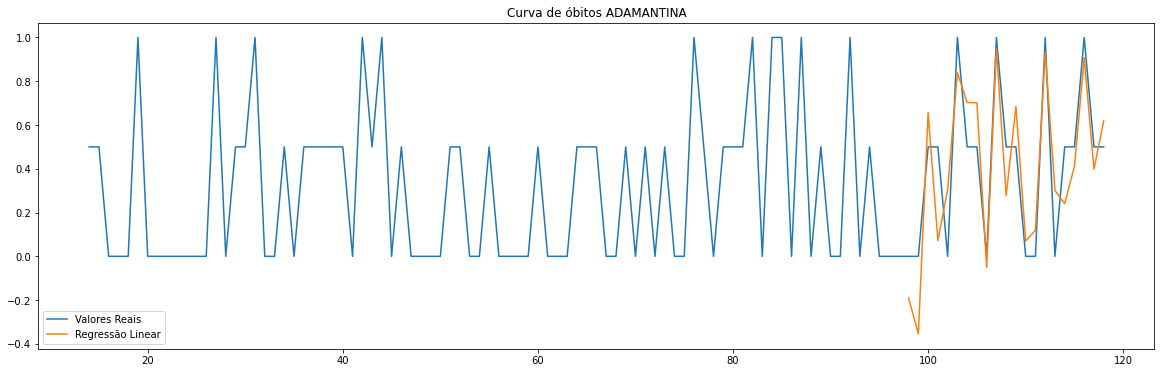

Erro quadrático
0.042007715111204276


In [1573]:
input_dim = menor2
tam = 30

dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
df_generated = generate_time_lags2(dataframe, input_dim)
df_generated

val = df_generated[df_generated.shape[0]-tam-1:]
df_generated = df_generated[:-tam]
test_ratio = 0.2

lista = ['media_movel_obitos', 'media_isolamento']

for k in range(1, input_dim+1):
    lista.append(f"lag{k}")

X = df_generated[lista]
y = pd.DataFrame(data=[])
y['obito'] = df_generated['obito']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.title("Curva de óbitos " + nome)
plt.legend()
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['obito'], y_test['pred']))

## Normalização utilizando standard

In [1574]:
dataframe = pd.read_csv('../Finais/'+cidade+'.csv')
dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,...,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,0,0,0,ADAMANTINA,3500105.0,35111.0,2068.0,543.0,0.0,...,5.889892,1.546524,2021-02-21,11.0,1.0,16.571429,0.571429,79.81,43.00,0.0
1,1,1,1,1,ADAMANTINA,3500105.0,35111.0,2079.0,547.0,0.0,...,5.921221,1.557916,2021-02-22,24.0,1.0,17.428571,0.571429,80.29,37.25,0.0
2,2,2,2,2,ADAMANTINA,3500105.0,35111.0,2104.0,608.0,0.0,...,5.992424,1.731651,2021-02-23,13.0,0.0,15.142857,0.571429,80.77,38.25,0.0
3,3,3,3,3,ADAMANTINA,3500105.0,35111.0,2110.0,615.0,0.0,...,6.009513,1.751588,2021-02-24,10.0,1.0,14.285714,0.571429,79.81,50.25,0.0
4,4,4,4,4,ADAMANTINA,3500105.0,35111.0,2125.0,739.0,0.0,...,6.052234,2.104753,2021-02-25,7.0,1.0,11.714286,0.714286,77.03,38.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,144,144,144,ADAMANTINA,3500105.0,35111.0,21276.0,7906.0,632.0,...,60.596394,24.317166,2021-07-15,9.0,0.0,10.428571,0.142857,69.18,39.25,0.0
145,145,145,145,145,ADAMANTINA,3500105.0,35111.0,21559.0,7968.0,632.0,...,61.402410,24.493748,2021-07-16,6.0,0.0,9.857143,0.142857,72.95,37.75,0.0
146,146,146,146,146,ADAMANTINA,3500105.0,35111.0,21747.0,7997.0,632.0,...,61.937854,24.576344,2021-07-17,3.0,0.0,8.142857,0.000000,68.59,40.25,0.0
147,147,147,147,147,ADAMANTINA,3500105.0,35111.0,21747.0,7997.0,632.0,...,61.937854,24.576344,2021-07-18,5.0,0.0,7.714286,0.000000,65.58,45.00,0.0


In [1575]:
scaler = StandardScaler()
norma = scaler.fit_transform(dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']))
df_scaled = pd.DataFrame(norma, columns=dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']).columns)
df_scaled[[ 'Município', 'Código IBGE', 'data']] = dataframe[[ 'Município', 'Código IBGE', 'data']]
df_scaled

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R,Município,Código IBGE,data
0,-1.720465,-1.720465,-1.720465,0.0,-1.388394,-1.677764,-0.250856,-1.497988,-1.388394,-1.658040,-0.544871,0.590619,0.427559,-0.043846,-1.657499,0.800494,0.0,ADAMANTINA,3500105.0,2021-02-21
1,-1.697216,-1.697216,-1.697216,0.0,-1.386443,-1.676090,-0.250856,-1.496095,-1.386443,-1.656399,1.488685,0.590619,0.620413,-0.043846,-1.590281,-1.072060,0.0,ADAMANTINA,3500105.0,2021-02-22
2,-1.673966,-1.673966,-1.673966,0.0,-1.382008,-1.650562,-0.250856,-1.485242,-1.382008,-1.631381,-0.232016,-0.806242,0.106135,-0.043846,-1.523063,-0.746399,0.0,ADAMANTINA,3500105.0,2021-02-23
3,-1.650716,-1.650716,-1.650716,0.0,-1.380944,-1.647632,-0.250856,-1.483601,-1.380944,-1.628510,-0.701299,0.590619,-0.086720,-0.043846,-1.657499,3.161540,0.0,ADAMANTINA,3500105.0,2021-02-24
4,-1.627467,-1.627467,-1.627467,0.0,-1.378283,-1.595739,-0.250856,-1.466059,-1.378283,-1.577653,-1.170581,0.590619,-0.665283,0.391689,-2.046804,-0.827814,0.0,ADAMANTINA,3500105.0,2021-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.627467,1.627467,1.627467,0.0,2.018727,1.403590,4.468007,1.935050,2.018727,1.620987,-0.857726,-0.806242,-0.954564,-1.350450,-3.146099,-0.420737,0.0,ADAMANTINA,3500105.0,2021-07-15
145,1.650716,1.650716,1.650716,0.0,2.068926,1.429536,4.468007,1.978589,2.068926,1.646415,-1.327008,-0.806242,-1.083134,-1.350450,-2.618157,-0.909230,0.0,ADAMANTINA,3500105.0,2021-07-16
146,1.673966,1.673966,1.673966,0.0,2.102273,1.441673,4.468007,2.005975,2.102273,1.658309,-1.796290,-0.806242,-1.468843,-1.785985,-3.228721,-0.095076,0.0,ADAMANTINA,3500105.0,2021-07-17
147,1.697216,1.697216,1.697216,0.0,2.102273,1.441673,4.468007,2.005975,2.102273,1.658309,-1.483435,-0.806242,-1.565270,-1.785985,-3.650234,1.451817,0.0,ADAMANTINA,3500105.0,2021-07-18


In [1576]:
for dias in range(0, 15):
    
    tam = 30
    test_ratio = 0.2
    

    df_generated = generate_time_lags(df_scaled, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_casos']
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)

    print(str(dias) + " -> "+ str(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])))


0 -> 0.6871362399856236
1 -> 0.36191937690837195
2 -> 0.3585797938078789
3 -> 0.3350847853411696
4 -> 0.3442341201323844
5 -> 0.3602186937746039
6 -> 0.33001224920894723
7 -> 0.3473299020306246
8 -> 0.2556626345208979
9 -> 0.24867884233406332
10 -> 0.25097561753619996
11 -> 0.250693005493152
12 -> 0.24669345653712693
13 -> 0.2370600545205437
14 -> 0.23005207816904752
